In [ ]:
#Elbow Technique help you to determine the K 
#SSE = Sum of Squared Error
#finding the all different SSE from different cluster 
#plot all the SSE it will show elbow 
#where the elbow point we will consider that K value

In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv(r"C:\Users\DREAM\Desktop\K_Means.csv")

In [8]:
df.head()

,Name,Age,Income($)
0,Rob,43,92327
1,Harshad,37,97631
2,Piyu,39,81307
3,Priyanka,42,70902
4,Jaggu,46,74504


In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [12]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 2, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1])

In [13]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,43,92327,0
1,Harshad,37,97631,0
2,Piyu,39,81307,0
3,Priyanka,42,70902,0
4,Jaggu,46,74504,0


In [14]:
km.cluster_centers_

array([[3.95000000e+01, 8.12623750e+04],
       [3.61666667e+01, 8.74102667e+05],
       [3.85000000e+01, 6.44736250e+05]])

In [16]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

No handles with labels found to put in legend.


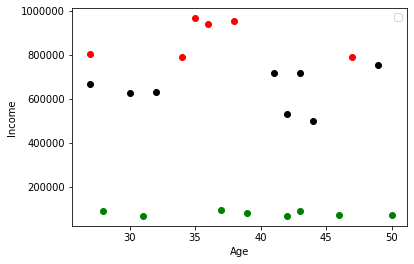

In [17]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [18]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.695652,0.025774,0
1,Harshad,0.434783,0.031687,0
2,Piyu,0.521739,0.013489,0
3,Priyanka,0.652174,0.001890,0
4,Jaggu,0.826087,0.005905,0


In [19]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0])

In [20]:
km.cluster_centers_

array([[0.23369565, 0.8123107 ],
       [0.54347826, 0.01343917],
       [0.75362319, 0.66966173]])

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

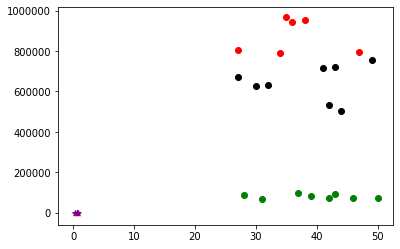

In [28]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker='*',label='centroid')

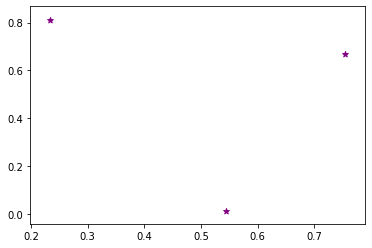

In [29]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker='*',label='centroid')

In [30]:
#elbow

In [36]:
sse=[]

k_rng = range(1,10)

for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [37]:
sse

[5.1144958589265155,
 2.3052496397833058,
 1.3086552231457087,
 0.8045472425477351,
 0.5021881302550042,
 0.3506043029993324,
 0.24612705846978805,
 0.1809500268113451,
 0.13629932718704238]

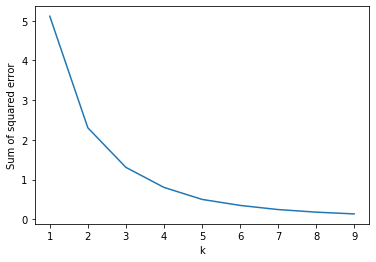

In [38]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)